In [14]:
import pandas as pd
import matplotlib.pyplot as plt
# Read the CSV file into a DataFrame
df = pd.read_csv('ObesityDataSet.csv')

print(df.head())
#test

   Gender   Age  Height  Weight family_history_with_overweight  \
0  Female  21.0    1.62    64.0                            yes   
1  Female  21.0    1.52    56.0                            yes   
2    Male  23.0    1.80    77.0                            yes   
3    Male  27.0    1.80    87.0                             no   
4    Male  22.0    1.78    89.8                             no   

  eat_high_caloric_food  eat_vegetables_frequency  main_meals_day  \
0                    no                       2.0             3.0   
1                    no                       3.0             3.0   
2                    no                       2.0             3.0   
3                    no                       3.0             3.0   
4                    no                       2.0             1.0   

  eat_between_meals smoke  water_day monitor_calories  exercise_frequency  \
0         Sometimes    no        2.0               no                 0.0   
1         Sometimes   yes        3

In [9]:
parameter_names = df.columns.tolist()
print(parameter_names)

['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'eat_high_caloric_food', 'eat_vegetables_frequency', 'main_meals_day', 'eat_between_meals', 'smoke', 'water_day', 'monitor_calories', 'exercise_frequency', 'device_time', 'drink_alcohol', 'transport_mode', 'obese_category']


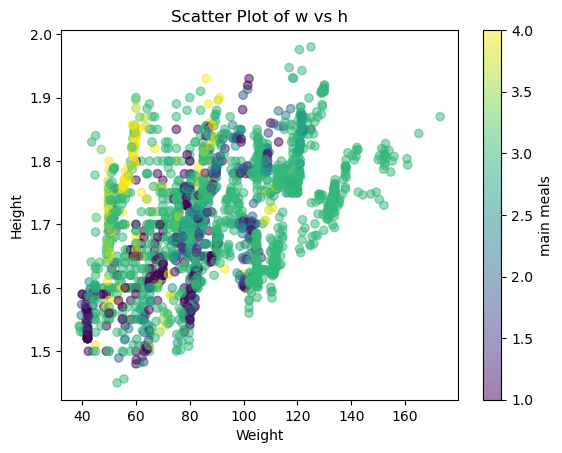

(2111, 17)

In [13]:
plt.scatter(df['Weight'], df['Height'], c=df['main_meals_day'], cmap='viridis', alpha=0.5)
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Scatter Plot of w vs h')
plt.colorbar(label='main meals')
plt.show()
df.shape


In [15]:
import os

# Get the current working directory
current_directory = os.getcwd()

# Print the current working directory
print("Current directory:", current_directory)

Current directory: C:\Users\Thoma
